In [ ]:
#Gauss Seidel Relaxed Method Calculations

#Purpose:
  #This program solves for variables in a system of equations using the Guass Seidel Relaxed method.
  #It calculates x1, x1, and x3 of a 3x3 matrix while implementing the use of lamda.

#Date       Programmer     Version
#-------    -----------    -------
#02/29/24   J. S. Prieto      1

In [ ]:
#Data Dictionary:

#A                     ! coefficient matrix
#data_matrix           ! data matrix pulled from txt file
#b                     ! constant vector
#xinit (0)             ! initial solution guess vector (1d) (make sure it is a NumPy vector)
#es                    ! stopping criterion
#maxit                 ! maximum number of iterations
#Amatrix               ! coefficient matrix
#result_array          ! array of valus calculted using GaussSeidelRelaxed() includes vales of lamda
#lam                   ! value of lamda
#temp2                 ! number of iterations
#temp                  ! solved values of x1, x2, and x3 using 19 different values for lamda


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [ ]:
#os.chdir('/content/drive/My Drive/Colab Notebooks/data')
os.chdir('/content/drive/Shared drives/shared_226_s24/data')   #For shared files

In [ ]:
#Ask the user for the file name
#Enter lab6data.txt
#Note that this file contains the wront initial value (on purpoe). You should create your own input file as instructed in the lab assignment.

In [ ]:
filename = input('Enter the name of your file, including the extension:  ')


Enter the name of your file, including the extension:  lab6data.txt


In [ ]:
#Attempt to read in the file with FileNoteFoundError trapping

In [ ]:
while True and filename!='exit':
  try:
      i = 0
      with open(filename,'r') as data_file:

        for line in data_file: #Each line in the text file is read separately
          if i ==0:  #For the first line, we read the number of equations, the maximum iterations allowed, and the error tolerance
            data = line.split() # The split function splits data in a single lie into multiple data (based on commas, or spaces, or tabs)
            neqn = int(data[0])
            xval = np.full((neqn),-9.99)
            xval[:] = float(data[1])
            maxiter = int(data[2])
            err_tol = float(data[3])
            print(neqn, xval, maxiter, err_tol) # Key info so good to print and verify, specially while programming it
            data_matrix = np.full((neqn,neqn + 1), -999) # We then create a Numpy array (based on neqn) to store the actual matrix
            i = i +1
            j = 0

          else:
            data = line.split()
            for k in range(0,neqn+1):  # Since we expect neqn + 1 number of columns in our matrix, we read each one into our NumPy Array
              data_matrix[j,k] = float(data[k])
              #print(i, j, k)
            j = j + 1


      print(f' The file {filename} has been read successfully')

  except FileNotFoundError:
      print(type(FileNotFoundError))
      print('Please verify the name of the file and re-enter it')
      filename = input('Enter the name of your file, including the extension:  ')
  else:
      break
print(f' Exited data file reading while loop')

3 [0. 0. 0.] 1000 0.0001
 The file lab6data.txt has been read successfully
 Exited data file reading while loop


In [ ]:
type(data_matrix)

numpy.ndarray

In [ ]:
print(xval)
print(err_tol)

[0. 0. 0.]
0.0001


In [ ]:
print(data_matrix) # Always verify you read your data before proceeding further

[[ 6 -1 -1  3]
 [ 6  9  1 40]
 [-3  1 12 50]]


In [ ]:
print(data)


['-3', '1', '12', '50']


#Guass Seidel Relaxed Function Including Check for Diagonal Dominance



In [ ]:
def GaussSeidelrelaxed(A,b,xinit,es,maxit,lam):

  """
      Implements the Gauss-Seidel method

      to solve a set of linear algebraic equations

      without relaxation

      Input:

      A = coefficient matris

      b = constant vector

      xinit = initial solution guess vector (1d) (make sure it is a NumPy vector)

      es = stopping criterion
      maxit = maximum number of iterations



      Output:

      x = solution vector

  """


  n,m = np.shape(A)

  if n != m :

    return 'Coefficient matrix must be square'

  C = np.zeros((n,n)) # Identity matrix

  x = xinit.copy() #Copy over the


  for i in range(n):  # set up C matrix with zeros on the diagonal

      for j in range(n):

        if i != j:

          C[i,j] = A[i,j]

  d = np.zeros((n,1))

  for i in range(n):  # divide C elements by A pivots

    C[i,0:n] = C[i,0:n]/A[i,i]
    d[i] = b[i]/A[i,i]

  ea = np.zeros((n,1))

  xold = np.zeros((n,1))

  for i in range(0,n):
    sum=0
    for j in range (0,n):
      sum = sum + abs(C[i][j])
    sum= sum- abs(C[i][i])
  if (abs(C[i][i])<sum):
    print("Not Diagonally Dominant")

  else:
    print("Matrix is Diagonally Dominant")

  for it in range(maxit):  # Gauss-Seidel method

    for i in range(n):

      xold[i] = x[i]  # save the x's for convergence test

    for i in range(n):



      x[i] = d[i] - C[i,:].dot(x)  # update the x's 1-by-1
      x[i]= x[i]*lam+(1-lam)*xold[i]

      if x[i] != 0:

          ea[i] = abs((x[i]-xold[i])/x[i])  # compute change error



    if np.max(ea) < es:  # exit for loop if es stopping criterion is met

      return x, it

    if it == maxit-1:  # check for maximum iteration exit

      x[:] = np.nan
      return x, it

    else:

      continue




In [ ]:
Amatrix = data_matrix[:,0:neqn]

In [ ]:
print(Amatrix)

[[ 6 -1 -1]
 [ 6  9  1]
 [-3  1 12]]


In [ ]:
b_rhs = data_matrix[:,neqn:neqn+1]
print(b_rhs)

[[ 3]
 [40]
 [50]]


In [ ]:
#Declare initial soluiton

In [ ]:
GaussSeidelrelaxed(Amatrix,b_rhs, xval, err_tol, maxiter, 0.1)

<ipython-input-13-cdd0f692c8e8>:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = d[i] - C[i,:].dot(x)  # update the x's 1-by-1
<ipython-input-13-cdd0f692c8e8>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]= x[i]*lam+(1-lam)*xold[i]


(array([1.69732319, 2.83169316, 4.3532392 ]), 86)

In [ ]:
#Call GaussSeidel Function (no relaxation)
result_array= np.full((19,5),-9.99)
lam=0
for i in range(19):
  lam= lam+0.1
  print(i,lam)
  temp,temp2= GaussSeidelrelaxed(Amatrix,b_rhs, xval, err_tol, maxiter, lam)
  result_array[i,1]= temp2 #iterations
  result_array[i,0]= lam #lamda value
  result_array[i,2]= temp[0] #x1 value
  result_array[i,3]= temp[1] #x2 Value
  result_array[i,4]= temp[2]  #x3 value



# array to get values of lamda 0.1-2.0

# temp= GS_lam()
# result_array[0,i]= temp[i]
# x1= temp[0][0]
# #x2= temp[]

0 0.1
1 0.2
2 0.30000000000000004
3 0.4
4 0.5
5 0.6
6 0.7
7 0.7999999999999999
8 0.8999999999999999
9 0.9999999999999999
10 1.0999999999999999
11 1.2
12 1.3
13 1.4000000000000001
14 1.5000000000000002
15 1.6000000000000003
16 1.7000000000000004
17 1.8000000000000005


<ipython-input-13-cdd0f692c8e8>:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = d[i] - C[i,:].dot(x)  # update the x's 1-by-1
<ipython-input-13-cdd0f692c8e8>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]= x[i]*lam+(1-lam)*xold[i]


18 1.9000000000000006


In [ ]:
print(result_array) #four or five decimal places

[[1.00000000e-01 8.60000000e+01 1.69732319e+00 2.83169316e+00
  4.35323920e+00]
 [2.00000000e-01 4.50000000e+01 1.69741369e+00 2.82994188e+00
  4.35453057e+00]
 [3.00000000e-01 2.90000000e+01 1.69742522e+00 2.82960069e+00
  4.35479061e+00]
 [4.00000000e-01 2.10000000e+01 1.69742618e+00 2.82932978e+00
  4.35499207e+00]
 [5.00000000e-01 1.60000000e+01 1.69742238e+00 2.82916275e+00
  4.35511446e+00]
 [6.00000000e-01 1.30000000e+01 1.69740163e+00 2.82901335e+00
  4.35521811e+00]
 [7.00000000e-01 1.00000000e+01 1.69740201e+00 2.82897974e+00
  4.35524215e+00]
 [8.00000000e-01 8.00000000e+00 1.69738517e+00 2.82894476e+00
  4.35526405e+00]
 [9.00000000e-01 6.00000000e+00 1.69737103e+00 2.82893849e+00
  4.35526685e+00]
 [1.00000000e+00 5.00000000e+00 1.69736916e+00 2.82894576e+00
  4.35526348e+00]
 [1.10000000e+00 7.00000000e+00 1.69736061e+00 2.82895847e+00
  4.35526321e+00]
 [1.20000000e+00 9.00000000e+00 1.69734781e+00 2.82898034e+00
  4.35528718e+00]
 [1.30000000e+00 1.40000000e+01 1.697405

In [ ]:
np.linalg.solve(Amatrix,b_rhs)

array([[1.69736842],
       [2.82894737],
       [4.35526316]])

#Printing Values table

In [ ]:
print('|'+('-'*63)+'|')
print(f'|{"Lamda":^11}|{"Iterations":^12}|{"x1":^12}|{"x2":^12}|{"x3":^12}|')
print('|'+('-'*63)+'|')
for i in range(19):
  print(f'|{result_array[i,0]:^11,.1f}|{result_array[i,1]:^12,.0f}|{result_array[i,2]:^12,.4f}|{result_array[i,3]:^12,.4f}|{result_array[i,4]:^12,.4f}|')
print('|'+('-'*63)+'|')
print("\n")


|---------------------------------------------------------------|
|   Lamda   | Iterations |     x1     |     x2     |     x3     |
|---------------------------------------------------------------|
|    0.1    |     86     |   1.6973   |   2.8317   |   4.3532   |
|    0.2    |     45     |   1.6974   |   2.8299   |   4.3545   |
|    0.3    |     29     |   1.6974   |   2.8296   |   4.3548   |
|    0.4    |     21     |   1.6974   |   2.8293   |   4.3550   |
|    0.5    |     16     |   1.6974   |   2.8292   |   4.3551   |
|    0.6    |     13     |   1.6974   |   2.8290   |   4.3552   |
|    0.7    |     10     |   1.6974   |   2.8290   |   4.3552   |
|    0.8    |     8      |   1.6974   |   2.8289   |   4.3553   |
|    0.9    |     6      |   1.6974   |   2.8289   |   4.3553   |
|    1.0    |     5      |   1.6974   |   2.8289   |   4.3553   |
|    1.1    |     7      |   1.6974   |   2.8290   |   4.3553   |
|    1.2    |     9      |   1.6973   |   2.8290   |   4.3553   |
|    1.3  

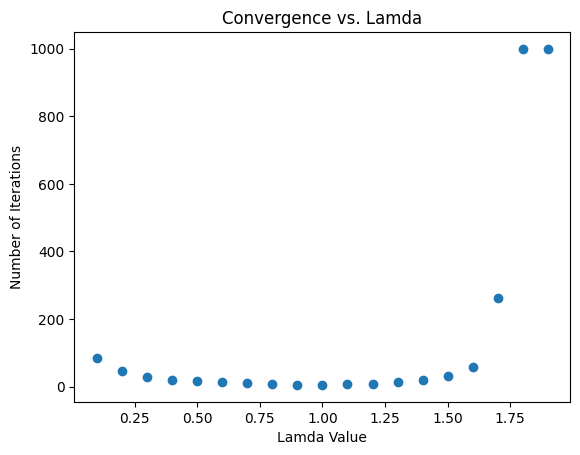



Lamda value 1.0 produced the smallest number of iterations.


In [ ]:
import matplotlib.pyplot as plt


x=result_array[:,0]; y=result_array[:,1]

plt.scatter(x,y)
plt.title("Convergence vs. Lamda")
plt.xlabel("Lamda Value")
plt.ylabel("Number of Iterations")
plt.show()

print("\n")
print("Lamda value 1.0 produced the smallest number of iterations.")

In [ ]:
Non_ddom= np.array([[-3.,1.,12.],  #not diagonally dominant matrix check
                    [6.,-1.,-1.],
                    [6.,9.,1.]])

print (GaussSeidelrelaxed(Non_ddom,b_rhs, xval, err_tol, maxiter, lam))


Not Diagonally Dominant
(array([nan, nan, nan]), 999)


<ipython-input-40-3ef30914bd5d>:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = d[i] - C[i,:].dot(x)  # update the x's 1-by-1
<ipython-input-40-3ef30914bd5d>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]= x[i]*lam+(1-lam)*xold[i]
<ipython-input-40-3ef30914bd5d>:86: RuntimeWarning: invalid value encountered in divide
  ea[i] = abs((x[i]-xold[i])/x[i])  # compute change error
